<a href="https://colab.research.google.com/github/michaelyliu6/Audio-Classification-using-TensorFlow/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Obtaining the Dataset

In [ ]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                        'frog', 'horse', 'ship', 'truck'])

train_set, test_set = keras.datasets.cifar10.load_data()

# convert uint8 RGB images to float RGB images in range [0,1]
train_input = train_set[0].astype(np.float32) / 255.0
test_input = test_set[0].astype(np.float32) / 255.0

# convert class labels to one-hot encoding
train_output = keras.utils.to_categorical(train_set[1], num_classes=10)
test_output = keras.utils.to_categorical(test_set[1], num_classes=10)

# Simple Model

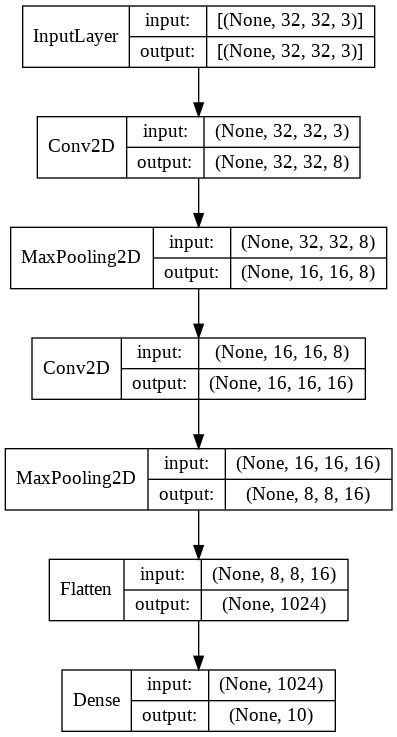

In [ ]:
def model_1():
  i = layers.Input(shape=(32,32,3), dtype='float32')
  h = layers.Conv2D(8, (3,3), padding='same', activation='relu', 
                    kernel_initializer='he_uniform', use_bias=True)(i)
  h = layers.MaxPool2D((2,2), padding='same')(h)
  h = layers.Conv2D(16, (3,3), padding='same', activation='relu',
                    kernel_initializer='he_uniform', use_bias=True)(h)
  h = layers.MaxPool2D((2,2), padding='same')(h)
  h = layers.Flatten()(h)
  o = layers.Dense(10, activation=None, kernel_initializer='glorot_uniform', use_bias=True)(h)
  return keras.Model(inputs=[i], outputs=[o])
  
keras.utils.plot_model(model_1(), show_shapes=True, show_layer_names=False)

# More Complex Model

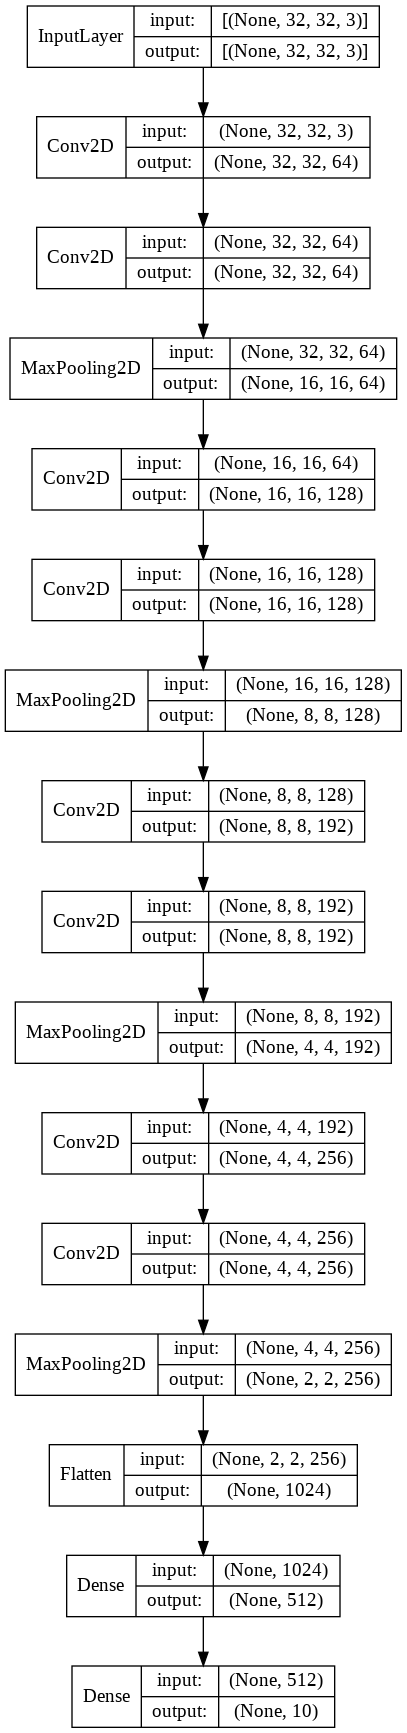

In [ ]:
def model_2():
  def vgg_block(x, num_filt):
    h = layers.Conv2D(num_filt, (3,3), padding='same', activation='relu',
                      kernel_initializer='he_uniform', use_bias=True)(x)
    h = layers.Conv2D(num_filt, (3,3), padding='same', activation='relu',
                      kernel_initializer='he_uniform', use_bias=True)(h)
    o = layers.MaxPool2D((2,2), padding='same')(h)
    return o 

  i = layers.Input(shape=(32,32,3), dtype='float32')
  h = vgg_block(i, 64)
  h = vgg_block(h, 128)
  h = vgg_block(h, 192)
  h = vgg_block(h, 256)
  h = layers.Flatten()(h)
  h = layers.Dense(512, activation='relu', kernel_initializer='he_uniform',
                   use_bias=True)(h)
  o = layers.Dense(10, activation=None, kernel_initializer='glorot_uniform',
                   use_bias=True)(h)
  return keras.Model(inputs=[i], outputs=[o])

keras.utils.plot_model(model_2(), show_shapes=True, show_layer_names=False)

# Training Experiments

Epoch 1/10
500/500 - 3s - loss: 1.6907 - categorical_accuracy: 0.3976 - val_loss: 1.4853 - val_categorical_accuracy: 0.4719
Epoch 2/10
500/500 - 2s - loss: 1.3985 - categorical_accuracy: 0.5081 - val_loss: 1.3335 - val_categorical_accuracy: 0.5356
Epoch 3/10
500/500 - 2s - loss: 1.2785 - categorical_accuracy: 0.5519 - val_loss: 1.2515 - val_categorical_accuracy: 0.5557
Epoch 4/10
500/500 - 2s - loss: 1.2001 - categorical_accuracy: 0.5803 - val_loss: 1.1899 - val_categorical_accuracy: 0.5865
Epoch 5/10
500/500 - 2s - loss: 1.1449 - categorical_accuracy: 0.6007 - val_loss: 1.1330 - val_categorical_accuracy: 0.6047
Epoch 6/10
500/500 - 2s - loss: 1.1064 - categorical_accuracy: 0.6156 - val_loss: 1.1230 - val_categorical_accuracy: 0.6042
Epoch 7/10
500/500 - 2s - loss: 1.0753 - categorical_accuracy: 0.6265 - val_loss: 1.1031 - val_categorical_accuracy: 0.6185
Epoch 8/10
500/500 - 2s - loss: 1.0507 - categorical_accuracy: 0.6366 - val_loss: 1.0816 - val_categorical_accuracy: 0.6218
Epoch 9/

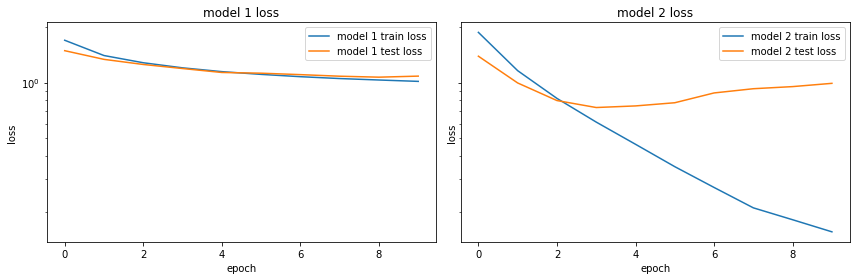

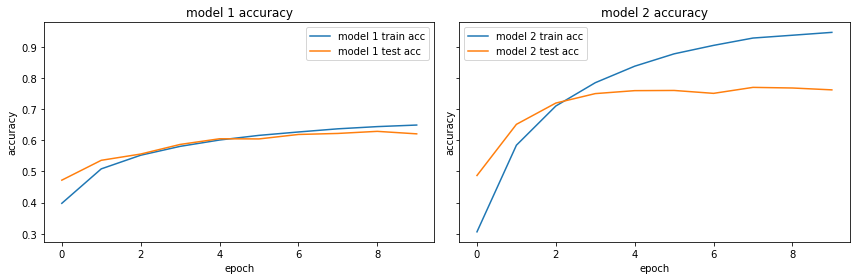

In [ ]:
model_1 = model_1()
model_2 = model_2()
history = []
for (model_i, model) in enumerate([model_1, model_2]):
  optimizer = keras.optimizers.Nadam()
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(optimizer=optimizer, loss=loss, metrics=['categorical_accuracy'])
  history.append(model.fit(x=train_input, y=train_output,
                 validation_data=(test_input, test_output),
                 batch_size=100, epochs=10, verbose=2))
  
# create loss plots
figure_size = plt.rcParams.get('figure.figsize')
num_plots = len(history)
_, axarr = plt.subplots(1, num_plots, figsize=(figure_size[0]*num_plots, figure_size[1]), sharey=True)
for (model_i, history_i) in enumerate(history):
  axarr[model_i].semilogy(history_i.history['loss'], label='model {:d} train loss'.format(model_i + 1))
  axarr[model_i].semilogy(history_i.history['val_loss'], label='model {:d} test loss'.format(model_i + 1))
  axarr[model_i].set_xlabel('epoch')
  axarr[model_i].set_ylabel('loss')
  axarr[model_i].set_title('model {:d} loss'.format(model_i + 1))
  axarr[model_i].legend()
plt.tight_layout()
# create accuracy plots
_, axarr = plt.subplots(1, num_plots, figsize=(figure_size[0]*num_plots, figure_size[1]), sharey=True)
for (model_i, history_i) in enumerate(history):
  axarr[model_i].plot(history_i.history['categorical_accuracy'], label='model {:d} train acc'.format(model_i + 1))
  axarr[model_i].plot(history_i.history['val_categorical_accuracy'], label='model {:d} test acc'.format(model_i + 1))
  axarr[model_i].set_xlabel('epoch')
  axarr[model_i].set_ylabel('accuracy')
  axarr[model_i].set_title('model {:d} accuracy'.format(model_i + 1))
  axarr[model_i].legend()
plt.tight_layout()

print("best test accuracy:")
for (model_i, history_i) in enumerate(history):
  print("model {:d}: {:f}%".format(model_i + 1, max(history_i.history['val_categorical_accuracy']) * 100.0))


best test acc: 84.399998%


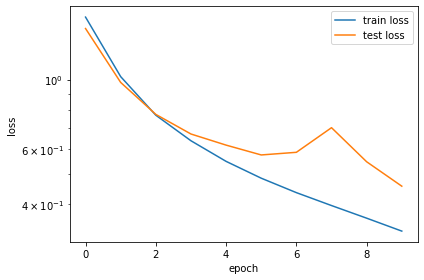

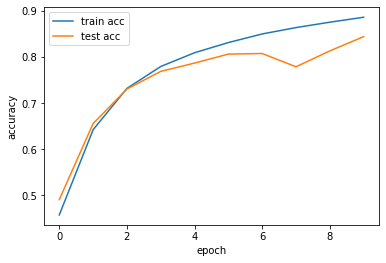

In [ ]:
def model_3(conv_drop=0.1, fc_drop=0.3):
  def vgg_block(i, num_filt):
    h = layers.Conv2D(num_filt, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform', use_bias=True)(i)
    h = layers.Dropout(conv_drop)(h)
    h = layers.Conv2D(num_filt, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform', use_bias=True)(h)
    h = layers.Dropout(conv_drop)(h)
    y = layers.MaxPool2D((2,2), padding='same')(h)
    return y 
  i = keras.layers.Input(shape=(32,32,3), dtype='float32')
  h = keras.layers.BatchNormalization()(i)
  h = vgg_block(i, 64)
  h = keras.layers.BatchNormalization()(h)
  h = vgg_block(h, 128)
  h = keras.layers.BatchNormalization()(h)
  h = vgg_block(h, 192)
  h = keras.layers.BatchNormalization()(h)
  h = vgg_block(h, 256)
  h = keras.layers.Flatten()(h)
  h = keras.layers.BatchNormalization()(h)
  h = keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform', use_bias=True)(h)
  h = keras.layers.BatchNormalization()(h)
  h = keras.layers.Dropout(fc_drop)(h)
  o = keras.layers.Dense(10, activation=None, kernel_initializer='glorot_uniform', use_bias=True)(h)
  return keras.Model(inputs=[i], outputs=[o])

model = model_3()
opt = keras.optimizers.Nadam()
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['categorical_accuracy'])
data_gen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
improved_hist = model.fit(x=data_gen.flow(train_input, train_output, batch_size=100),
                 validation_data=(test_input, test_output),
                 epochs=10, verbose=0)
plt.figure()
plt.semilogy(improved_hist.history['loss'], label='train loss')
plt.semilogy(improved_hist.history['val_loss'], label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.figure()
plt.plot(improved_hist.history['categorical_accuracy'], label='train acc')
plt.plot(improved_hist.history['val_categorical_accuracy'], label='test acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
print("best test acc: {:f}%".format(max(improved_hist.history['val_categorical_accuracy']) * 100.0))